In [5]:
import pandas as pd
import numpy as np

df = pd.read_csv('Heart_Disease_Prediction.csv')

# Switch Heart Disease Variable to numerical
df['Heart Disease'] = df['Heart Disease'].map({'Presence': 1, 'Absence': 0})
df['TrainTest'] = np.random.choice(['Train','Test'], size = len(df), p = [.75, .25])
df.head()

,index,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease,TrainTest
0,0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1,Train
1,1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0,Train
2,2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1,Test
3,3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0,Train
4,4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0,Test


In [7]:
# Standaradize the data
from sklearn.preprocessing import StandardScaler

predictors = df[['Age', 'Sex', 'Chest pain type', 'BP', 'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina', 'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium']]

scale = StandardScaler()
stand_predictors = scale.fit_transform(predictors)

new_df = pd.DataFrame(stand_predictors, columns = predictors.columns)
new_df['Heart Disease'] = df['Heart Disease']
new_df['TrainTest'] = np.random.choice(['Train','Test'], size = len(df), p = [.75, .25])

new_df.head()

,Age,Sex,Chest pain type,BP,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease,TrainTest
0,1.712094,0.689500,0.870928,-0.075410,-0.417029,0.981664,-1.759208,-0.701222,1.181012,0.676419,2.472682,-0.875706,1,Train
1,1.382140,-1.450327,-0.183559,-0.916759,-0.417029,0.981664,0.446409,-0.701222,0.481153,0.676419,-0.711535,1.189277,0,Train
2,0.282294,0.689500,-1.238045,-0.411950,-0.417029,-1.026285,-0.375291,-0.701222,-0.656118,-0.954234,-0.711535,1.189277,1,Test
3,1.052186,0.689500,0.870928,-0.187590,-0.417029,-1.026285,-1.932198,1.426081,-0.743600,0.676419,0.349871,1.189277,0,Train
4,2.152032,-1.450327,-1.238045,-0.636310,-0.417029,0.981664,-1.240239,1.426081,-0.743600,-0.954234,0.349871,-0.875706,0,Train


<Axes: >

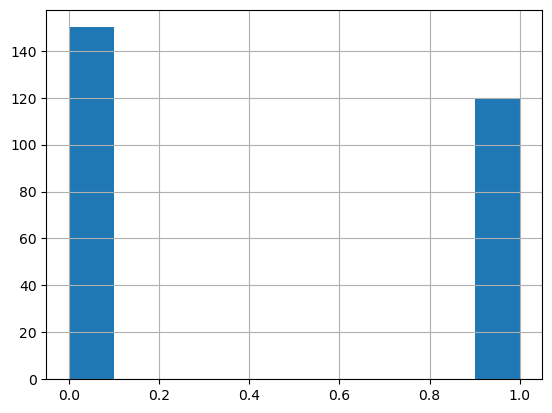

In [23]:
# Split into X and y
X = new_df[['Age', 'Sex', 'Chest pain type', 
            'BP', 'FBS over 120', 'EKG results', 
            'Max HR', 'Exercise angina', 
            'ST depression', 'Slope of ST', 
            'Number of vessels fluro', 'Thallium']]

X_Train = new_df.loc[new_df['TrainTest'] == 'Train'][['Age', 'Sex', 'Chest pain type', 
                                                      'BP', 'FBS over 120', 'EKG results', 
                                                      'Max HR', 'Exercise angina', 
                                                      'ST depression', 'Slope of ST', 
                                                      'Number of vessels fluro', 'Thallium']]

y_Train = new_df.loc[new_df['TrainTest'] == 'Train']['Heart Disease']

X_Test = new_df.loc[new_df['TrainTest'] == 'Test'][['Age', 'Sex', 'Chest pain type', 
                                                      'BP', 'FBS over 120', 'EKG results', 
                                                      'Max HR', 'Exercise angina', 
                                                      'ST depression', 'Slope of ST', 
                                                      'Number of vessels fluro', 'Thallium']]

y_Test = new_df.loc[new_df['TrainTest'] == 'Test']['Heart Disease']

y = new_df['Heart Disease']

new_df['Heart Disease'].hist()

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

list_of_models = [GradientBoostingClassifier(learning_rate=0.07,n_estimators=80),
                  HistGradientBoostingClassifier(learning_rate=0.05),
                  RandomForestClassifier(max_depth=5, min_samples_leaf=6,min_samples_split=9),
                  LogisticRegression(),
                  KNeighborsClassifier(n_neighbors=22),
                  DecisionTreeClassifier(max_depth=5)]

fitted_models = [model.fit(X = X_Train,  y = y_Train)for model in list_of_models]

list_predict_proba = [pd.DataFrame(
    data = model.predict_proba(
        X = X
    )
)[1] for model in fitted_models]
df_pred = pd.concat(
    objs = list_predict_proba,
    axis = 1
)

df_pred.columns = fitted_models
df_pred.columns = [
    'GradientBoostingClassifier',
    'HistGradientBoostingClassifier',
    'RandomForestClassifier',
    'LogisticRegression',
    'KNeighborsClassifier',
    'DecisionTreeClassifier']

df_pred['Ensemble'] = df_pred.mean(axis = 1)

df_pred.head()

,GradientBoostingClassifier,HistGradientBoostingClassifier,RandomForestClassifier,LogisticRegression,KNeighborsClassifier,DecisionTreeClassifier,Ensemble
0,0.924556,0.867268,0.746269,0.977539,0.909091,1.0,0.904121
1,0.146880,0.169705,0.333017,0.264135,0.363636,0.2,0.246229
2,0.141939,0.081053,0.264748,0.122552,0.227273,0.0,0.139594
3,0.337527,0.646579,0.682211,0.886684,0.863636,0.0,0.569440
4,0.050113,0.068192,0.194907,0.116956,0.090909,0.0,0.086846


In [55]:
df_pred['Ensemble_Worst'] = df_pred[['LogisticRegression','RandomForestClassifier','KNeighborsClassifier']].mean(axis = 1)
df_pred['Ensemble_Best'] = df_pred[['DecisionTreeClassifier','GradientBoostingClassifier', 
                                                       'HistGradientBoostingClassifier']].mean(axis = 1)

In [57]:
df_pred['Stacking_Worst'] = pd.DataFrame(GradientBoostingClassifier().fit(
    X = df_pred.loc[df['TrainTest'] == 'Train',['LogisticRegression','RandomForestClassifier','KNeighborsClassifier']],
    y = y.loc[df['TrainTest'] == 'Train']
).predict_proba(
    X = df_pred[['LogisticRegression','RandomForestClassifier','KNeighborsClassifier']]
))[1]

In [59]:
df_pred['Stacking_Best'] = pd.DataFrame(GradientBoostingClassifier().fit(
    X = df_pred.loc[df['TrainTest'] == 'Train',['DecisionTreeClassifier','GradientBoostingClassifier', 
                                                       'HistGradientBoostingClassifier']],
    y = y.loc[df['TrainTest'] == 'Train']
).predict_proba(
    X = df_pred[['DecisionTreeClassifier','GradientBoostingClassifier', 
                                                       'HistGradientBoostingClassifier']]
))[1]

In [61]:
df_pred

,GradientBoostingClassifier,HistGradientBoostingClassifier,RandomForestClassifier,LogisticRegression,KNeighborsClassifier,DecisionTreeClassifier,Ensemble,Ensemble_Best,Ensemble_Worst,Stacking_Best,Stacking_Worst
0,0.924556,0.867268,0.746269,0.977539,0.909091,1.00,0.904121,0.930608,0.877633,0.999063,0.994684
1,0.146880,0.169705,0.333017,0.264135,0.363636,0.20,0.246229,0.172195,0.320263,0.004912,0.071698
2,0.141939,0.081053,0.264748,0.122552,0.227273,0.00,0.139594,0.074331,0.204858,0.006177,0.019177
3,0.337527,0.646579,0.682211,0.886684,0.863636,0.00,0.569440,0.328035,0.810844,0.015578,0.168693
4,0.050113,0.068192,0.194907,0.116956,0.090909,0.00,0.086846,0.039435,0.134257,0.002341,0.006735
...,...,...,...,...,...,...,...,...,...,...,...
265,0.061708,0.088267,0.176262,0.290922,0.318182,0.00,0.155890,0.049992,0.261789,0.002341,0.006781
266,0.064679,0.057024,0.182094,0.070215,0.181818,0.00,0.092638,0.040568,0.144709,0.001502,0.030408
267,0.151009,0.155053,0.213974,0.055060,0.136364,0.25,0.160243,0.185354,0.135132,0.006317,0.062026
268,0.127213,0.155332,0.310777,0.492978,0.454545,0.00,0.256808,0.094182,0.419433,0.006084,0.144695


In [63]:
from sklearn.metrics import roc_auc_score
auc_score_list = [[j,k,roc_auc_score(
    y_true = y.loc[df['TrainTest'] == j],
    y_score = df_pred.loc[df['TrainTest'] == j,k],
)] for j in ['Train','Test'] for k in df_pred.columns]

df_auc = pd.DataFrame(auc_score_list)
print(df_auc)

        0                               1         2
0   Train      GradientBoostingClassifier  0.980847
1   Train  HistGradientBoostingClassifier  0.965847
2   Train          RandomForestClassifier  0.942656
3   Train              LogisticRegression  0.916119
4   Train            KNeighborsClassifier  0.902792
5   Train          DecisionTreeClassifier  0.907754
6   Train                        Ensemble  0.964232
7   Train                   Ensemble_Best  0.971732
8   Train                  Ensemble_Worst  0.926964
9   Train                   Stacking_Best  1.000000
10  Train                  Stacking_Worst  1.000000
11   Test      GradientBoostingClassifier  0.989863
12   Test  HistGradientBoostingClassifier  0.977340
13   Test          RandomForestClassifier  0.970185
14   Test              LogisticRegression  0.933214
15   Test            KNeighborsClassifier  0.938581
16   Test          DecisionTreeClassifier  0.940072
17   Test                        Ensemble  0.980918
18   Test   